<a href="https://colab.research.google.com/github/legobitna/DeepLearning-basic/blob/main/10_2b_IMDB_Sentiment_Analysis_with_Embeddings_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMBD Sentiment Analysis with different model architectures and Glove Embeddings

## Prepare the data

In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 10000
embedding_dim = 100
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

Let's import tensorflow datasets library and download IDMB text reviews dataset!

In [7]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)
print("dd",imdb)
print("cc",info)

dd {'test': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>, 'train': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>, 'unsupervised': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>}
cc tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label

In [5]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [6]:
print("Sentence:", training_sentences[0])
print("Label:", training_labels[0])
print("---------------------------------")
print("Sentence:", training_sentences[1])
print("Label:", training_labels[1])
print("---------------------------------")
print("Sentence:", training_sentences[3])
print("Label:", training_labels[3])
print("---------------------------------")
print("Sentence:", training_sentences[5])
print("Label:", training_labels[5])

Sentence: This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
Label: 0
---------------------------------
Sentence: I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asl

Time to tokenize our sentences and pad them!

In [8]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [9]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print("Original:", training_sentences[0])
print("Tokenize:", sequences[0])
print("Reduce or Padded:", padded[0])
print("Decode:", decode_review(padded[0]))
print("Label:", training_labels_final[0])

Original: This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
Tokenize: [12, 14, 33, 425, 392, 18, 90, 28, 1, 9, 32, 1366, 3585, 40, 486, 1, 197, 24, 85, 154, 19, 12, 213, 329, 28, 66, 247, 215, 9, 477, 58, 66, 85, 114, 98, 22, 5675, 12, 1322, 643, 767, 12, 18, 7, 33, 400, 8170, 176, 2455, 416, 2, 89, 1231, 137, 69, 146, 52, 2, 1, 7577, 69,

It's always good to visualize training and validation loss or accuracy after training the model!

In [11]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

## Embedding layer with Flatten Layer


In [13]:
# YOUR CODE
# Build model with Flatten(), a Fully Connected Layer like 8 neurons and the last layer is a Fully Connected Layer with 1 neuron with activation is 'sigmoid'

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # your code
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 8)                 80008     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 1,080,017
Trainable params: 1,080,017
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 10s 13ms/step - loss: 0.4741 - accuracy: 0.7616 - val_loss: 0.3753 - val_accuracy: 0.8320
Epoch 2/10
782/782 [==============================] - 10s 13ms/step - loss: 0.1341 - accuracy: 0.9570 - val_loss: 0.4738 - val_accuracy: 0.8056
Epoch 3/10
782/782 [==============================] - 10s 13ms/step - loss: 0.0131 - accuracy: 0.9981 - val_loss: 0.5486 - val_accuracy: 0.8147
Epoch 4/10
782/782 [==============================] - 10s 13ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.5911 - val_accuracy: 0.8190
Epoch 5/10
782/782 [==============================] - 10s 13ms/step - loss: 5.4652e-04 - accuracy: 1.0000 - val_loss: 0.6214 - val_accuracy: 0.8216
Epoch 6/10
782/782 [==============================] - 10s 13ms/step - loss: 2.8994e-04 - accuracy: 1.0000 - val_loss: 0.6502 - val_accuracy: 0.8228
Epoch 7/10
782/782 [==============================] - 10s 13ms/step - loss: 1.6808e-04 - accuracy: 1.0000 - val_loss: 0.6784 - v

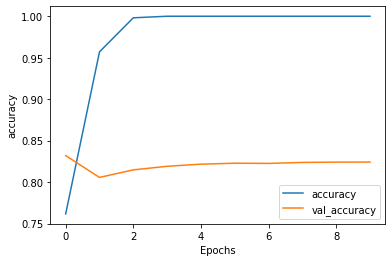

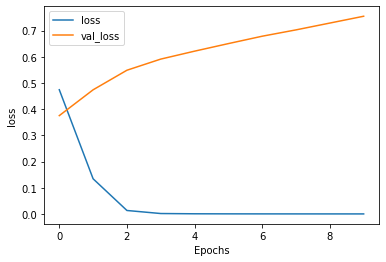

In [16]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### Prediction sentiment of some sentences

In [18]:
# YOUR CODE
# Hopefully, the first and third sentences are positive and middle one is negative

sentence = ["I really think this is amazing. honest.", "It sucks and so bad", "I love it so much!"]
sequences = tokenizer.texts_to_sequences(sentence)
print("Sequences:", sequences)
padded =  pad_sequences(sequences, padding=padding_type,maxlen=max_length)
print("Padded:", padded)
print("Prediction:", model.predict(padded))

Sequences: [[11, 64, 102, 12, 7, 478, 1199], [10, 1862, 3, 36, 76], [11, 117, 10, 36, 74]]
Padded: [[  11   64  102   12    7  478 1199    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [  10 1862    3   36   76    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0   

### Export the Embedding layer into vecs and meta files to visualise 

Run this code to export the values of vectors in embedding (vecs.tsv) and coressponding words (meta.tsv). Thus, you will have two files in total.

Remember to click "Allow to download multiple files" on Chrome to download two files at the same time!

Open http://projector.tensorflow.org/ and load those two files you just download so see the visualization in 3D or 2D of your word embedding!

In [19]:
import io
def export_embedding_tsv(model):
  e = model.layers[0]
  weights = e.get_weights()[0]
  #print(weights.shape) # shape: (vocab_size, embedding_dim)

  out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
  out_m = io.open('meta.tsv', 'w', encoding='utf-8')
  for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
  out_v.close()
  out_m.close()

  try:
    from google.colab import files
  except ImportError:
    pass
  else:
    files.download('vecs.tsv')
    files.download('meta.tsv')

In [20]:
export_embedding_tsv(model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Embedding layer with Global Average Pooling Layer

In [23]:
# YOUR CODE
# Use Global Average Pooling 1D and 2 Dense Layers with the last layer is one neuron and activation is sigmoid. 

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # your code
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')

    
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 808       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,000,817
Trainable params: 1,000,817
Non-trainable params: 0
_________________________________________________________________


In [24]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

ValueError: ignored

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Do you notice anything different from the last model about speed and accuracy?

## Embedding layer with a LSTM layer

In [26]:
# YOUR CODE
# Use LSTM layer with 2 Dense Layers followed it

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # your code
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
    
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 1,042,769
Trainable params: 1,042,769
Non-trainable params: 0
_________________________________________________________________


In [27]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

ValueError: ignored

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Embedding layer with a Bidirectional LSTM layer



In [31]:
# YOUR CODE
# Use bidirectional LSTM with 2 dense layers

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # your code
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
    
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               84480     
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 1032      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 1,085,521
Trainable params: 1,085,521
Non-trainable params: 0
_________________________________________________________________


In [30]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

ValueError: ignored

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Embedding layer with multiple Bidirectional LSTM layers



In [32]:
# YOUR CODE
# Use stacked bidirectional LSTM (2 bidirectional LSTM stacked on each other) with two dense layers 
# be mindful about return_sequence 

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # your code
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),

    
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 100, 128)          84480     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 1,126,225
Trainable params: 1,126,225
Non-trainable params: 0
_________________________________________________________________


ValueError: ignored

## CNN 1D

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 1,072,449
Trainable params: 1,072,449
Non-trainable params: 0
_________________________________________________________________


ValueError: ignored

What do you think about this model compared to other models? 

## Load Pre-trained Glove Embeddings into the Embedding Layer

In [35]:
word_index_size = len(word_index)

In [36]:
# Note this is the 100 dimension version of GloVe from Stanford
# I unzipped and hosted it on my site to make this notebook easier
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt
embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((word_index_size+1, embedding_dim));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

--2020-11-12 17:15:53--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘/tmp/glove.6B.100d.txt’

/tmp/glove.6B.100d. 100%[===================>] 331.04M   153MB/s    in 2.2s    

2020-11-12 17:15:55 (153 MB/s) - ‘/tmp/glove.6B.100d.txt’ saved [347116733/347116733]



In [37]:
print(len(embeddings_matrix))
# Expected Output
# 88584

88584


In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(word_index_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 100, 100)          8858400   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_average_pooling1d_3 ( (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 65        
Total params: 8,930,849
Trainable params: 72,449
Non-trainable params: 8,858,400
_________________________________________________________________


ValueError: ignored

Trying another architecture with Dropout and MaxPooling1D

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(word_index_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 100)          8858400   
_________________________________________________________________
dropout (Dropout)            (None, 100, 100)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 96, 64)            32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 24, 64)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 8,923,553
Trainable params: 65,153
Non-trainable params: 8,858,400
______________________________________

ValueError: ignored

After using dropout layer, the gap between training and validation is more narrow which is a good sign of reducing overfitting!

Also, we can try to export the tsv files from Embedding to visual it. Remember this is the Glove pre-trained embedding so it's not specialised for sentiment analysis so you can really see positive words (like good) on one side and negative words (like bad) on the other side like how we train our embedding layer from scratch.

Glove embedding is more powerful and general which is suitable for more tasks like predicting the next word in the sentences,...

In [40]:
export_embedding_tsv(model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

I hope you guys have fun and learn how to design many different architectures. Once again, you can see that sometimes data is more important than different architectures since most of the models performance slightly differently for this toy IMBD dataset.